# Accessing and managing groups
Groups are collaborative spaces in your GIS where your users share related content. Groups support metadata allowing you to customize them as per their theme. You can add users to a group with different group related privileges. Refer to the [topic on groups](https://doc.arcgis.com/en/arcgis-online/share-maps/groups.htm) to learn more about them.

In the `gis` module, groups are represented using instances of `Group` class. Similar to `Items`, `Users`, `Roles`, an instance of a resource manager class called `GroupManager` is used to create, search and provide you access to `Group` objects. As with other resource manager objects, you would not create an instance of `GroupManager` using its constructor, but access it from the `groups` property of the `GIS` object.

In this guide, we will observe:

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Searching-for-groups" data-toc-modified-id="Searching-for-groups-1">Searching for groups</a></span></li><li><span><a href="#Properties-of-a-group" data-toc-modified-id="Properties-of-a-group-2">Properties of a group</a></span></li><li><span><a href="#Creating-new-groups" data-toc-modified-id="Creating-new-groups-3">Creating new groups</a></span><ul class="toc-item"><li><span><a href="#Sharing-content-to-groups" data-toc-modified-id="Sharing-content-to-groups-3.1">Sharing content to groups</a></span></li></ul></li><li><span><a href="#Managing-your-groups" data-toc-modified-id="Managing-your-groups-4">Managing your groups</a></span><ul class="toc-item"><li><span><a href="#Listing-contents-of-the-group" data-toc-modified-id="Listing-contents-of-the-group-4.1">Listing contents of the group</a></span></li><li><span><a href="#Adding-users-to-the-group" data-toc-modified-id="Adding-users-to-the-group-4.2">Adding users to the group</a></span></li><li><span><a href="#Removing-users-from-a-group" data-toc-modified-id="Removing-users-from-a-group-4.3">Removing users from a group</a></span></li><li><span><a href="#Listing-users-belonging-to-a-group" data-toc-modified-id="Listing-users-belonging-to-a-group-4.4">Listing users belonging to a group</a></span></li><li><span><a href="#Updating-a-group" data-toc-modified-id="Updating-a-group-4.5">Updating a group</a></span></li><li><span><a href="#Terminating-a-group" data-toc-modified-id="Terminating-a-group-4.6">Terminating a group</a></span></li></ul></li></ul></div>

<a id="searching-for-groups"></a>
## Searching for groups
You can search for groups by using the `search()` method of `GroupManager` object. The `search()` method accepts standard [ArcGIS REST API queries](http://resources.arcgis.com/en/help/arcgis-rest-api/#/Search_reference/02r3000000mn000000/). To illustrate this better, let us connect to ArcGIS Online anonymously and search for public groups that have the word 'water' in the title.

In [5]:
from arcgis.gis import GIS
ago_gis = GIS()
urban_groups = ago_gis.groups.search('title:water', max_groups=15)
urban_groups

[<Group title:""High Water Mark" Initiative" owner:risson>,
 <Group title:""High Water Mark" Initiative Story Map Application" owner:MeghanL>,
 <Group title:"11134352_SUSQTWP_STORM_WATER" owner:Todd.Plank_GHD>,
 <Group title:"11134352_SUSQTWP_STORM_WATER" owner:risson>,
 <Group title:"2013 Audubon Center Water Quality Study" owner:williamtraddhymes>,
 <Group title:"2013 Audubon Water Quality" owner:nicboucher12>,
 <Group title:"2013 Audubon Water Quality" owner:andcardoza2013>,
 <Group title:"2013 Audubon Water Quality Study" owner:bdhsaudubon>,
 <Group title:"2013 Audubon Water Quality Study" owner:Bradlynn>,
 <Group title:"2013 Audubon Water Quality Study" owner:kylwalker>,
 <Group title:"2017 Esri Water Technical Workshops" owner:Deilson_EsriWater>,
 <Group title:"2018 Hurricane Michael Lifeline 2: Food, Water, Sheltering" owner:karmstrongDRP>,
 <Group title:"2018 PMS Texas Water StoryMaps" owner:becky_haluska>,
 <Group title:"3135214 Barwon Water Sanitary Surveys" owner:Scott.Venab

The `search()` method returns a list of objects of type `arcgis.gis.Group`. When using the Jupyter notebook environment, `Group` objects can be represented in rich HTML with their thumbnail and metadata information.

In [7]:
urban_groups[0]

<Group title:""High Water Mark" Initiative" owner:risson>

You can expand the query string to include multiple fields on a group such as `owner`, `description` etc. Let us look for groups created and owned by account `esri`.

In [8]:
esri_owned_groups = ago_gis.groups.search(query='owner:esri and description:basemaps', max_groups=15)
esri_owned_groups

[<Group title:"Antarctic Maps" owner:esri>,
 <Group title:"ArcGIS Online Basemaps" owner:esri>,
 <Group title:"ArcGlobe Basemaps" owner:esri>,
 <Group title:"ArcMap Basemaps" owner:esri>,
 <Group title:"Arctic Maps" owner:esri>,
 <Group title:"Basemap Feedback" owner:esri>,
 <Group title:"Community Basemaps" owner:esri>,
 <Group title:"Esri Maps and Data" owner:esri>,
 <Group title:"Living Atlas: Community Maps" owner:esri>,
 <Group title:"OpenStreetMap Vector Basemap" owner:esri>,
 <Group title:"Vector Basemaps" owner:esri>,
 <Group title:"World Basemaps (WGS84)" owner:esri>]

<a id="properties-of-a-group"></a>
## Properties of a group
You can query the metadata and related information about a group by querying the properties of its corresponding `Group` object:

In [10]:
esri_group1 = esri_owned_groups[0]
esri_group1.access

'public'

Let us print some more of the properties of this group

In [11]:
import time
print(esri_group1.groupid, esri_group1.isFav, esri_group1.isInvitationOnly)
print(esri_group1.owner)
time.localtime(esri_group1.created/1000)

6cd54e197601410e81a2cbcc9c3e1f22 False True
esri


time.struct_time(tm_year=2016, tm_mon=6, tm_mday=23, tm_hour=15, tm_min=49, tm_sec=45, tm_wday=3, tm_yday=175, tm_isdst=1)

Once you know the `id` of a group, you can access it using the `get()` method of the `GroupManager` object:

In [12]:
ago_gis.groups.get(esri_group1.groupid)

<Group title:"Antarctic Maps" owner:esri>

<a id="creating-new-groups"></a>
## Creating new groups
You can create new groups by calling the `create()` method of the `GroupManager` object. This method is similar to other `create` methods of `ResourceManager` objects and returns you an instance of the `Group` object it created.

Let us create a new group for geocaching enthusiasts in our GIS. Replace the credentials below with that of your org. To learn more about profiles, [see here](https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/#Storing-your-credentialls-locally)

<Group title:"Recreational geocaching" owner:arcgis_python>
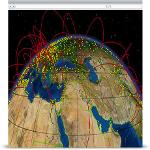

In [14]:
# connect to GIS with credentials
gis = GIS(profile='your_enterprise_profile')
geocaching_group = gis.groups.create(title='Recreational geocaching',
                                    tags = 'hobby, geocaching, gps, hide n seek',
                                    description = 'Group to share your landmarks and games',
                                    snippet = 'Share your GPX tracks as feature layers here',
                                    access = 'org',
                                    is_invitation_only = 'False',
                                    thumbnail = r'../../static/img/geocaching.jpeg')
geocaching_group

<a id="sharing-content-to-groups"></a>
### Sharing content to groups
In an ArcGIS Org, an `Item` can have 4 privacy levels - `private`, `group`, `org`, `everyone`. When an `Item` is shared to a group, all members of a group get to view it. Similarly, when shared to an organization, all authenticated members of the org can view it. When shared to everyone, and if the org permits anonymous access, the item is public and accessible to anyone and does not have to be a logged in user.

First, let us add a CSV containing some points to the GIS.

In [19]:
item_properties = {'title':'Hidden treasures',
                  'tags':['geocaching', 'searching', 'hikes', 'POI'],
                  'snippet':'Points containing treasures for geocaching activity'}
fc_item = gis.content.add(item_properties, data='../../samples/05_content_publishers/data/hidden_treasures_geocaching.csv')

In [20]:
fc_item.access

'private'

To share an `Item` to a group, call the `share()` method of the `Item` object and pass the `Group` object. You can also pass the name of the group or its ID.

In [22]:
# let us share it to the group so other enthusiasts can enjoy this map
fc_item.share(groups=geocaching_group)

{'results': [{'itemId': '5fc1b6702ff94228a71092e62f9bcdef',
   'success': True,
   'notSharedWith': []}]}

<a id="managing-your-groups"></a>
## Managing your groups

### Listing contents of the group
As the first step in managing your groups, let us view the items shared with the group by using the `content()` method

In [23]:
geocaching_group.content()

[<Item title:"Hidden treasures" type:CSV owner:arcgis_python>]

### Adding users to the group
Now our group has sufficient details and content to make it useful for others. Let us add some users. You can either add users using the `add_users()` method and specify the list of usernames, or if you wish to leave joining to their choice, you can invite them to the group using the `invite_users()` method.

In [24]:
# let us add 2 users to this group
geocaching_group.add_users(['api_data_owner', 'portaladmin'])

{'notAdded': []}

The method returns a dictionary with information on which users could not be added. As seen on the guide for [managing users](https://developers.arcgis.com/python/guide/accessing-and-managing-users/), users could have custom privileges  preventing them from joining groups. In such occasions, you would get the names of those users in this return list.

### Removing users from a group
You can remove users from a group by calling the `remove_users()` method and passing the list of usernames to be removed. The method returns you a dictionary containing those users who cannot be removed.

In [25]:
# remove the one of the members
geocaching_group.remove_users(['portaladmin'])

{'notRemoved': []}

In [26]:
# can you remove the owner of the group?
geocaching_group.remove_users(['arcgis_python_api'])

{'notRemoved': ['arcgis_python_api']}

Thus, you cannot remove the owner or admin of the group until you reassign the ownership to another user.

### Listing users belonging to a group
You can list the users in a group by calling the `get_members()` method. The method returns a dictionary that not only gives you the member list, but also the owner, admin and users.

In [27]:
geocaching_group.get_members()

{'owner': 'arcgis_python',
 'admins': ['arcgis_python'],
 'users': ['api_data_owner']}

### Updating a group
You can update any or all the fields of a group that you specified when creating it. Thus, the `update()` accepts the same parameters as `create()`. Let us close the group to members who can be added through invitation only. This prevents users from sending a joining request.

In [28]:
geocaching_group.update(is_invitation_only=True)

True

In [29]:
geocaching_group.isInvitationOnly

True

### Terminating a group
If a group no longer serves the purpose or if its requirements have changed, the owner and members have a few options. They can leave the group by calling the `leave()` method. When users leave a group, the content they shared with the group will automatically be unshared. The owner or org admin can delete the group by calling the `delete()` method. 

However if the contents and the group have to be preserved, the group's ownership can be transferred by calling the `reassign_to()` and specifying the new owner's username. 

<blockquote><b>Note:</b> Only the administrator of the org can reassign a group to another user.</blockquote>

let us reassign ownership to another user
```python
geocaching_group.reassign_to(target_owner = 'api_data_owner')
```

Finally, let us delete this group

In [35]:
geocaching_group.delete()

True